In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import math as mt
import os
from scipy import stats as st
import datetime as dt
pd.set_option('display.max_columns', None)

In [2]:
os.getcwd()

'/Users/mfernandez9120/Library/CloudStorage/Dropbox/MARCOS FERNANDEZ/Magister Data Science/Proyecto de Grado 2/Proyecto-Grado-DS/Codes python 2/3.Submuestreo y Manejo de NaNs'

In [3]:
# creacion de variables con las rutas de ubicacion de los archivos y documentos para cambiar de directorio en la medida sea requerido
ruta_base = '/Users/mfernandez9120/Library/CloudStorage/Dropbox/MARCOS FERNANDEZ/Magister Data Science/Proyecto de Grado 2/Proyecto-Grado-DS'
folder = '/BD procesada y sample/version 2'

In [4]:
print(ruta_base+folder)
nueva_ruta = ruta_base+folder
os.chdir(nueva_ruta)
os.getcwd()

/Users/mfernandez9120/Library/CloudStorage/Dropbox/MARCOS FERNANDEZ/Magister Data Science/Proyecto de Grado 2/Proyecto-Grado-DS/BD procesada y sample/version 2


'/Users/mfernandez9120/Library/CloudStorage/Dropbox/MARCOS FERNANDEZ/Magister Data Science/Proyecto de Grado 2/Proyecto-Grado-DS/BD procesada y sample/version 2'

In [5]:
print(os.getcwd())
os.listdir()

/Users/mfernandez9120/Library/CloudStorage/Dropbox/MARCOS FERNANDEZ/Magister Data Science/Proyecto de Grado 2/Proyecto-Grado-DS/BD procesada y sample/version 2


['df_preprocesado_target_real_knn_code2.csv',
 'df_feature_selection_code2.csv',
 'df_con_movil_diff_imputed.csv',
 'df_sample_imputed_knn_code2.csv',
 '.DS_Store',
 'df_preprocesado_target_real_knn.csv',
 'df_feature_selection.csv',
 'df_sample_knn.csv',
 'df_preprocesado_target_real_con_nan.csv',
 'df_con_target_and_cols_utils.csv',
 'df_sample_original_con_nan.csv',
 'df_preprocesado_target_real_code2.csv']

## CARGA DEL CONJUNTO PREPROCESADO

#### se considera importante primero imputar los valores del df, ya que para calcular las medias, varianzas y desv estd. moviles, deben estar completos de manera seguida o secuencial

In [6]:
df = pd.read_csv('df_preprocesado_target_real_code2.csv', sep=';', decimal=',', date_format='%Y-%m-%d')
df.drop('Unnamed: 0', axis=1, inplace=True)
print(df.shape, "Forma del df")
df.head()

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_30714/475600231.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df_preprocesado_target_real_code2.csv', sep=';', decimal=',', date_format='%Y-%m-%d')


(876900, 34) Forma del df


,Fecha_dia,edad_en_dias_al_ordeño,Días secos de lactancia anterior,N° de la Vaca,Nº de Lactancia,dias_en_leche,Fecha del Ultimo Parto_lac,Modo del Ultimo Parto,Nº de Celos del Sistema,Turno,lapso_sgdos_a_ordeña_ant,Hora inicio del ordeño en sgdos,Leche Diaria,Porduccion del Turno,Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal,Produccion de Leche a los 2 minutos,Porcentaje de leche a los 2 minutos,sgdos al Pico de leche durante el Tiempo de ordeño,duracion en sgdos total ordeño,Flujo a los 15 segundos,Flujo a los 30 segundos,Flujo a los 60 segundos,Flujo a los 120 segundos,Flujo Promedio leche durante el ordeño,Flujo Pico leche durante el ordeño,Coductividad Maxima 1,Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos,Eventos de Salud del sistema enlos ultimos 365 dias,Indice de Salud de Vacas en Ordeño,Actividad Diaria,Ruminacion Diaria,TIPO DE EVENTO,DIAS DE TRATAMIENTO,PERÍODO DE RESGUARDO LECHE
0,2021-10-01,2726,70.0,6281046,6.0,6,2021-09-25,Facil,3.0,Manana,NaN,20428.0,31.320000,16.910000,5.940000,5.4,32.0,190.0,375.0,1800.0,2340.0,3180.0,3600.0,2.705600,4.08,5.0,NaN,4.0,100.0,NaN,NaN,NaN,NaN,NaN
1,2021-10-01,2726,70.0,6281046,6.0,6,2021-09-25,Facil,3.0,Tarde,39326.0,59754.0,31.320000,14.410000,10.454000,6.0,41.0,170.0,330.0,1470.0,2760.0,3780.0,2940.0,2.620000,4.14,4.4,NaN,4.0,100.0,NaN,NaN,NaN,NaN,NaN
2,2021-10-02,2727,70.0,6281046,6.0,7,2021-09-25,Facil,3.0,Manana,47842.0,21196.0,30.360001,16.629999,6.792000,5.4,32.0,110.0,357.0,1830.0,3060.0,3300.0,3420.0,2.794958,4.38,5.1,NaN,4.0,100.0,NaN,NaN,NaN,NaN,NaN
3,2021-10-02,2727,70.0,6281046,6.0,7,2021-09-25,Facil,3.0,Tarde,38406.0,59602.0,30.360001,13.730000,7.751667,5.5,40.0,150.0,298.0,1440.0,2640.0,3120.0,3780.0,2.764430,4.08,4.4,NaN,4.0,90.0,NaN,NaN,NaN,NaN,NaN
4,2021-10-03,2728,70.0,6281046,6.0,8,2021-09-25,Facil,3.0,Manana,47405.0,20607.0,29.660000,14.920000,3.270000,5.3,35.0,180.0,300.0,1350.0,1920.0,3360.0,3240.0,2.984000,4.20,0.0,NaN,4.0,90.0,NaN,NaN,NaN,NaN,NaN


In [7]:
(df.select_dtypes(include=['float', "int"]).isna().sum() / df.shape[0]*100).sort_values(ascending=False).head(30)

PERÍODO DE RESGUARDO LECHE                                                               99.926788
DIAS DE TRATAMIENTO                                                                      99.906831
Días secos de lactancia anterior                                                         31.895427
Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos    17.722317
lapso_sgdos_a_ordeña_ant                                                                 12.627552
Porcentaje de leche a los 2 minutos                                                       3.284525
Produccion de Leche a los 2 minutos                                                       3.283613
Flujo a los 120 segundos                                                                  2.941270
Flujo a los 60 segundos                                                                   2.029194
Flujo a los 30 segundos                                                                   1.675790
Flujo a lo

In [8]:
(df.drop(["PERÍODO DE RESGUARDO LECHE","DIAS DE TRATAMIENTO"], axis=1).select_dtypes(include=['float', "int"]).isna().sum() / df.drop(["PERÍODO DE RESGUARDO LECHE","DIAS DE TRATAMIENTO"], axis=1).shape[0]*100).sort_values(ascending=False).head(30).mean()

3.172256644830484

## CREACION DE UN SUB MUESTREO REPRESENTATIVO
### *para realizar todas las pruebas*

In [9]:
# Transformacion de las columnas Fechas objetc a Fechas datetime de pandas
for col in df.filter(like="Fe").columns:
    print(col)
    df[col] = pd.to_datetime(df[col], errors="coerce")

Fecha_dia
Fecha del Ultimo Parto_lac


In [10]:
#Order por fecha y hora
df.sort_values(by=["Fecha_dia","Hora inicio del ordeño en sgdos"], inplace=True)

In [11]:
# DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)
df_sample = df.sample(frac=0.33, random_state=42, axis=0, ignore_index=True)
df_sample.groupby([df["Fecha_dia"].dt.year, df["Fecha_dia"].dt.month]).size()

Fecha_dia  Fecha_dia
2021       10           11226
           11           11964
           12           13333
2022       1            14107
           2            12339
           3            14158
           4            13514
           5            10683
           6             6865
           7             4805
           8             6810
           9             7812
           10           10086
           11           11372
           12           12308
2023       1            12753
           2            11592
           3            12709
           4            12156
           5            10752
           6             6375
           7             4133
           8             4939
           9             6296
           10            7982
           11            8554
           12            9052
2024       1             9420
           2             8340
           3             2942
dtype: int64

In [13]:
df_sample.rename(columns={"TIPO DE EVENTO": "Target"}, inplace=True)

In [14]:
cols_date = []
cols_object = []
cols_float = []
cols_int = []
cols_others = []

for col in df_sample.columns:
    
    if df_sample[col].dtype == "datetime64[ns]":
        cols_date.append(col)
    elif df_sample[col].dtype == "object":
        cols_object.append(col)
    elif df_sample[col].dtype == "float":
        cols_float.append(col)
    elif df_sample[col].dtype == "int":
        cols_int.append(col)
    else:
        cols_others.append(col)
        
dicc_list = {"date": cols_date, "float": cols_float, "int": cols_int, "object": cols_object, "others": cols_others}

In [15]:
df_sample[dicc_list["object"]]

,Modo del Ultimo Parto,Turno,Target
0,Leve Ayuda,Manana,NaN
1,Leve Ayuda,Tarde,NaN
2,Facil,Tarde,NaN
3,Facil,Tarde,NaN
4,Facil,Manana,NaN
...,...,...,...
289372,NaN,Manana,NaN
289373,Leve Ayuda,Tarde,NaN
289374,Facil,Tarde,NaN
289375,NaN,Manana,NaN


In [16]:
df_sample.head(5)

,Fecha_dia,edad_en_dias_al_ordeño,Días secos de lactancia anterior,N° de la Vaca,Nº de Lactancia,dias_en_leche,Fecha del Ultimo Parto_lac,Modo del Ultimo Parto,Nº de Celos del Sistema,Turno,lapso_sgdos_a_ordeña_ant,Hora inicio del ordeño en sgdos,Leche Diaria,Porduccion del Turno,Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal,Produccion de Leche a los 2 minutos,Porcentaje de leche a los 2 minutos,sgdos al Pico de leche durante el Tiempo de ordeño,duracion en sgdos total ordeño,Flujo a los 15 segundos,Flujo a los 30 segundos,Flujo a los 60 segundos,Flujo a los 120 segundos,Flujo Promedio leche durante el ordeño,Flujo Pico leche durante el ordeño,Coductividad Maxima 1,Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos,Eventos de Salud del sistema enlos ultimos 365 dias,Indice de Salud de Vacas en Ordeño,Actividad Diaria,Ruminacion Diaria,Target,DIAS DE TRATAMIENTO,PERÍODO DE RESGUARDO LECHE
0,2022-06-04,1423,87.0,6282713,2.0,214,2021-11-02,Leve Ayuda,3.0,Manana,46452.0,24950.0,13.082000,7.370,0.657143,6.3,85.0,70.0,168.0,1920.0,3420.0,4260.0,2340.0,2.632143,4.38,0.0,-5.102881,3.0,100.000000,585.0,404.0,NaN,NaN,NaN
1,2023-05-24,1031,NaN,16323800,1.0,309,2022-07-19,Leve Ayuda,4.0,Tarde,37059.0,58994.0,13.210000,3.560,1.176286,2.7,75.0,70.0,228.0,150.0,300.0,1920.0,840.0,0.936842,3.66,5.0,-10.311111,5.0,99.689357,558.0,495.0,NaN,NaN,NaN
2,2024-01-24,895,NaN,19444403,1.0,169,2023-08-08,Facil,4.0,Tarde,NaN,61280.0,17.466999,8.041,0.804714,5.2,64.0,40.0,231.0,1560.0,3720.0,2280.0,3060.0,2.088571,3.72,0.0,NaN,0.0,96.291607,712.0,361.0,NaN,NaN,NaN
3,2023-10-31,1543,87.0,16323368,3.0,56,2023-09-05,Facil,2.0,Tarde,37804.0,58624.0,24.510000,12.630,-3.368143,3.0,23.0,310.0,486.0,510.0,1320.0,1800.0,1860.0,1.809288,3.72,0.0,-0.606061,0.0,93.716310,587.0,479.0,NaN,NaN,NaN
4,2023-10-13,1523,90.0,16323374,3.0,77,2023-07-28,Facil,5.0,Manana,NaN,19893.0,25.900000,12.740,-0.190571,6.8,53.0,140.0,255.0,2520.0,3720.0,4020.0,4500.0,2.997647,4.62,4.9,2.395833,1.0,99.306095,622.0,496.0,NaN,NaN,NaN


In [17]:
# VISUALIZACION DE LA DISTRIBUCION TEMPORAL DEL DF SAMPLE DE DATOS
df_sample.groupby([df_sample["Fecha_dia"].dt.year,df_sample["Fecha_dia"].dt.month]).size()

Fecha_dia  Fecha_dia
2021       10            6872
           11            7855
           12            8770
2022       1             9350
           2             8100
           3             9398
           4             8975
           5             7192
           6             4753
           7             3991
           8             7018
           9             8008
           10           10304
           11           11509
           12           12557
2023       1            13156
           2            11915
           3            12864
           4            12300
           5            10701
           6             6606
           7             4658
           8             7881
           9            10672
           10           12942
           11           13759
           12           14534
2024       1            14660
           2            13286
           3             4791
dtype: int64

In [ ]:
### REVISION DESV. STD Y VARIANZA EN VARIABLES NUMERICAS

In [20]:
cols_checks = df_sample.select_dtypes(include=["int","float"]).columns.to_list()
cols_no_checks = [col for col in df_sample.columns if col not in cols_checks]
print("Q de columnas NO int or float: ", len(cols_no_checks))
print("Q de columnas int or float: ", len(cols_checks))
print(cols_checks)

Q de columnas NO int or float:  5
Q de columnas int or float:  29
['edad_en_dias_al_ordeño', 'Días secos de lactancia anterior', 'N° de la Vaca', 'Nº de Lactancia', 'dias_en_leche', 'Nº de Celos del Sistema', 'lapso_sgdos_a_ordeña_ant', 'Hora inicio del ordeño en sgdos', 'Leche Diaria', 'Porduccion del Turno', 'Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal', 'Produccion de Leche a los 2 minutos', 'Porcentaje de leche a los 2 minutos', 'sgdos al Pico de leche durante el Tiempo de ordeño', 'duracion en sgdos total ordeño', 'Flujo a los 15 segundos', 'Flujo a los 30 segundos', 'Flujo a los 60 segundos', 'Flujo a los 120 segundos', 'Flujo Promedio leche durante el ordeño', 'Flujo Pico leche durante el ordeño', 'Coductividad Maxima 1', 'Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos', 'Eventos de Salud del sistema enlos ultimos 365 dias', 'Indice de Salud de Vacas en Ordeño', 'Actividad Diaria', 'Ruminacion Diaria', 'DIA

In [21]:
df_sample[cols_no_checks]

,Fecha_dia,Fecha del Ultimo Parto_lac,Modo del Ultimo Parto,Turno,Target
0,2022-06-04,2021-11-02,Leve Ayuda,Manana,NaN
1,2023-05-24,2022-07-19,Leve Ayuda,Tarde,NaN
2,2024-01-24,2023-08-08,Facil,Tarde,NaN
3,2023-10-31,2023-09-05,Facil,Tarde,NaN
4,2023-10-13,2023-07-28,Facil,Manana,NaN
...,...,...,...,...,...
289372,2023-03-11,2022-11-16,NaN,Manana,NaN
289373,2022-08-08,2022-07-15,Leve Ayuda,Tarde,NaN
289374,2023-10-02,2023-07-31,Facil,Tarde,NaN
289375,2023-07-19,2022-10-13,NaN,Manana,NaN


In [22]:
# Visualizacion del dataset:
cols_checks = df_sample.select_dtypes(include=["int","float"]).columns.to_list()

cols_checks.remove("N° de la Vaca")
cols_checks.remove('Nº de Lactancia')
cols_checks.remove('Eventos de Salud del sistema enlos ultimos 365 dias')

for i in cols_checks:
    print(i)
    var = df_sample[i].var()
    print("VARIANZA:", var)
    std = df_sample[i].std()
    print("DESV. STD:", std)
    print("")

edad_en_dias_al_ordeño
VARIANZA: 302091.6022458878
DESV. STD: 549.6286039189443

Días secos de lactancia anterior
VARIANZA: 248.39413634122965
DESV. STD: 15.760524621383315

dias_en_leche
VARIANZA: 7291.7258540095745
DESV. STD: 85.39160294788695

Nº de Celos del Sistema
VARIANZA: 10.280463813799878
DESV. STD: 3.206316237335282

lapso_sgdos_a_ordeña_ant
VARIANZA: 42227454.68442473
DESV. STD: 6498.265513537033

Hora inicio del ordeño en sgdos
VARIANZA: 394777825.87927204
DESV. STD: 19869.016731566564

Leche Diaria
VARIANZA: 42.103306740410275
DESV. STD: 6.488706091387579

Porduccion del Turno
VARIANZA: 12.929151054147408
DESV. STD: 3.5957128714828452

Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal
VARIANZA: 5.003785668463851
DESV. STD: 2.2369143185343177

Produccion de Leche a los 2 minutos
VARIANZA: 2.841312649557124
DESV. STD: 1.6856193667483546

Porcentaje de leche a los 2 minutos
VARIANZA: 352.38463699489427
DESV. STD: 18.771910850920165

sgdos al Pico 

In [23]:
(df_sample.select_dtypes(include=['float', "int"]).isna().sum() / df_sample.shape[0]*100).sort_values(ascending=False).head(30)

PERÍODO DE RESGUARDO LECHE                                                               99.931232
DIAS DE TRATAMIENTO                                                                      99.914990
Días secos de lactancia anterior                                                         31.925827
Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos    17.781648
lapso_sgdos_a_ordeña_ant                                                                 12.753605
Porcentaje de leche a los 2 minutos                                                       3.265982
Produccion de Leche a los 2 minutos                                                       3.265982
Flujo a los 120 segundos                                                                  2.931124
Flujo a los 60 segundos                                                                   2.008798
Flujo a los 30 segundos                                                                   1.674286
Flujo a lo

## IMPUTACION DE VALORES NAN DEL DF

In [24]:
from sklearn.impute import KNNImputer

Se puede imputar con KNN o con otro algoritmo predictivo como Random Forest.

Quizas deba incluir en la imputacion los valores ceros en algunas columnas que no deberían tener, como lo es conductividad maxima 1.

Además, hay 3 columnas que no se imputaron ("Cambio en la Conductividad en Deviaciones Estandar","Cambio en la Conductividad en porcentaje","lapso_dias_entre_partos")

debido a que es una gran cantidad de valores nan.

In [27]:
cols_numeric = cols_checks.copy()

no_incluir = ["edad_en_dias_al_ordeño","Leche Diaria","N° de la Vaca","dias_en_leche","PERÍODO DE RESGUARDO LECHE","DIAS DE TRATAMIENTO"]

cols_numeric = [x for x in cols_numeric if x not in no_incluir]

(df_sample[cols_numeric].isna().sum() / df_sample.shape[0]*100).sort_values(ascending=False)

Días secos de lactancia anterior                                                         31.925827
Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos    17.781648
lapso_sgdos_a_ordeña_ant                                                                 12.753605
Produccion de Leche a los 2 minutos                                                       3.265982
Porcentaje de leche a los 2 minutos                                                       3.265982
Flujo a los 120 segundos                                                                  2.931124
Flujo a los 60 segundos                                                                   2.008798
Flujo a los 30 segundos                                                                   1.674286
Flujo a los 15 segundos                                                                   1.506685
Actividad Diaria                                                                          0.990404
Ruminacion

In [28]:
df[no_incluir].isna().sum()

edad_en_dias_al_ordeño             0
Leche Diaria                       0
N° de la Vaca                      0
dias_en_leche                      0
PERÍODO DE RESGUARDO LECHE    876258
DIAS DE TRATAMIENTO           876083
dtype: int64

In [ ]:
## SE ENTRENA EN EL SAMPLE Y SE APLICA EN EL DF ORIGINAL

## LOS PORCENTAJES DE NAN PARA IMPUTAR A NIVEL DEL DATASET COMPLETO NO ES UNA GRAN CANTIDAD...
## PERO PARA EL CONJUNTO QUE CORRESPONDE A LA CLASE TARGET MINORITARIA ES CASI EL 50% DE LOS REGISTROS

In [29]:
# Crear el KNN imputer
knn = KNNImputer(n_neighbors=5, metric="nan_euclidean", missing_values= np.nan, weights='distance')

# Imputar los valores faltantes
knn.fit(df_sample[cols_numeric])

KNNImputer(weights='distance')

In [30]:
imputed_knn = knn.transform(df[cols_numeric])
print("IMPUTADO:", imputed_knn.shape)
print("ORIGINAL:", df[cols_numeric].shape)
df_imputed_knn = pd.DataFrame(imputed_knn, columns = cols_numeric)

IMPUTADO: (876900, 21)
ORIGINAL: (876900, 21)


In [32]:
print(df_sample.shape)
print(df.shape)

(289377, 34)
(876900, 34)


In [ ]:
df_sample2 = df_sample.copy()

for col in cols_numeric:
    print(col)
    df_sample2[col] = round(df_sample_imputed_knn[col], 3)

In [ ]:
(df_sample2.isna().sum() / df_sample2.shape[0]).sort_values(ascending=False).head(30)

In [ ]:
indices = df_sample2[df_sample2["N° de la Vaca"]==999].index
df_sample2.drop(indices, inplace= True)
df_sample2.reset_index(drop= True, inplace= True)

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


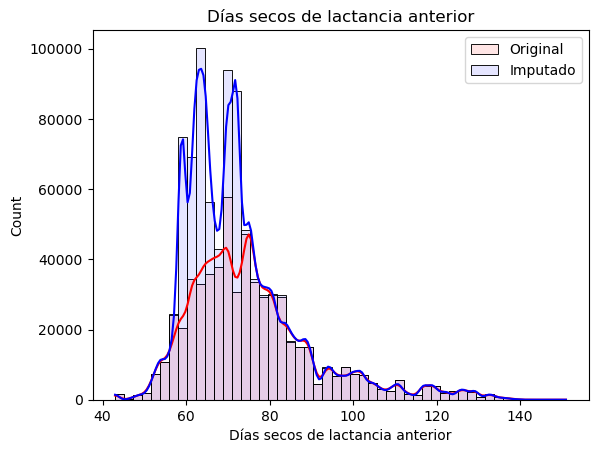

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


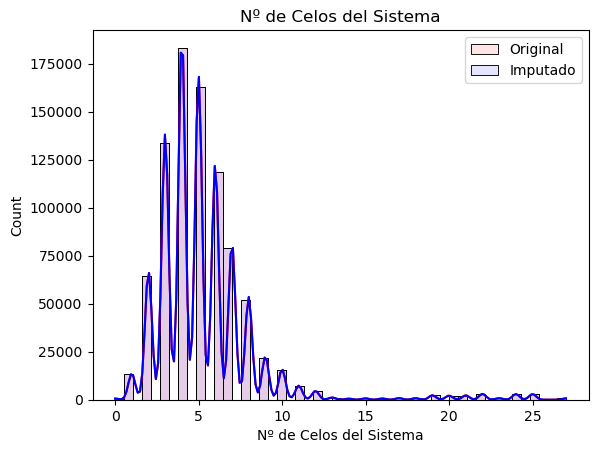

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


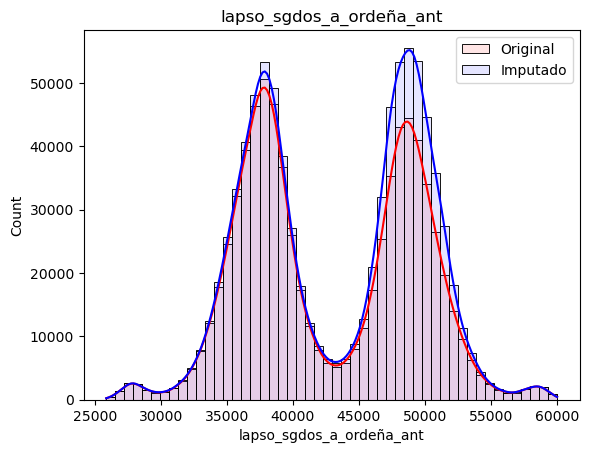

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


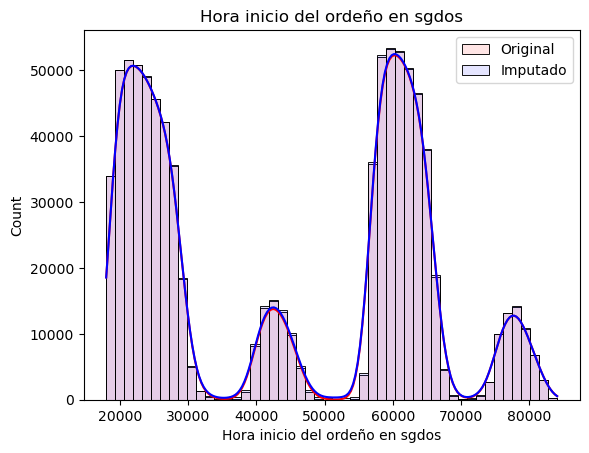

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


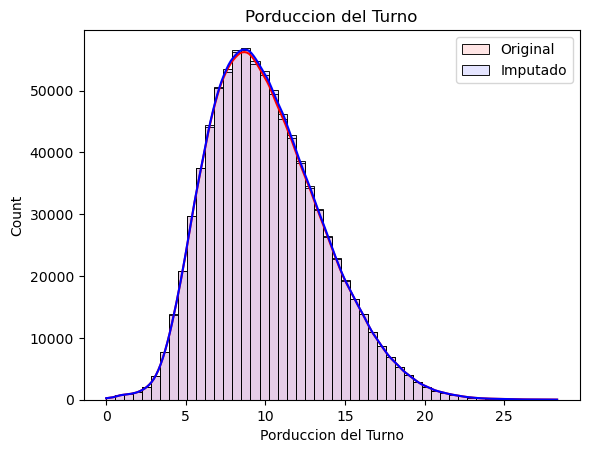

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


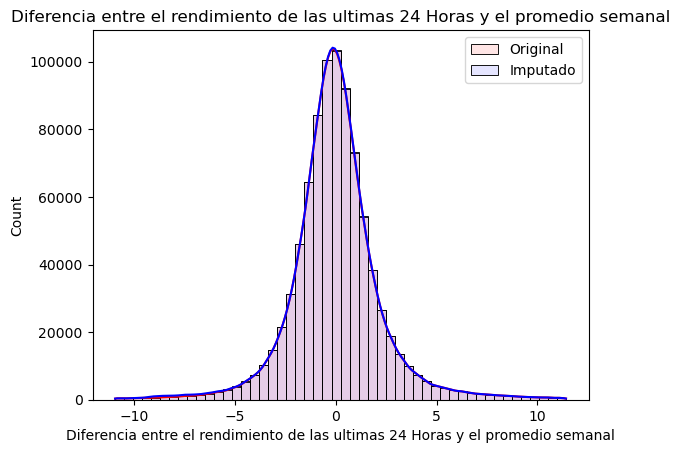

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


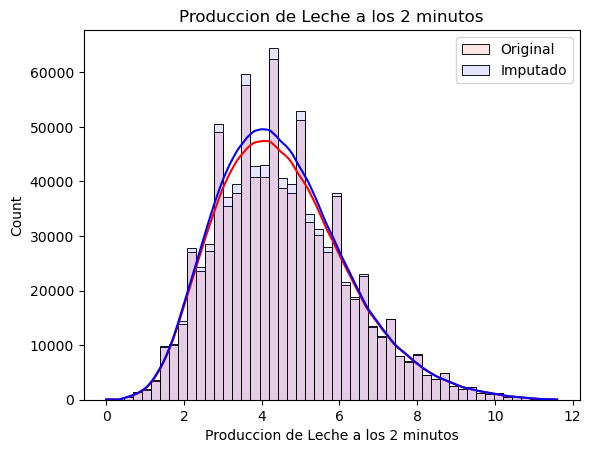

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


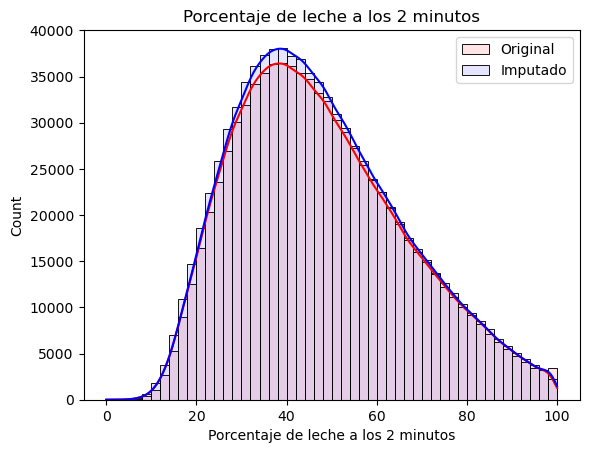

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


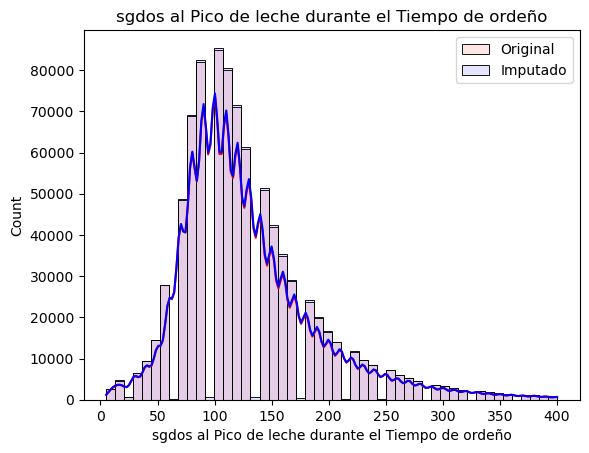

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


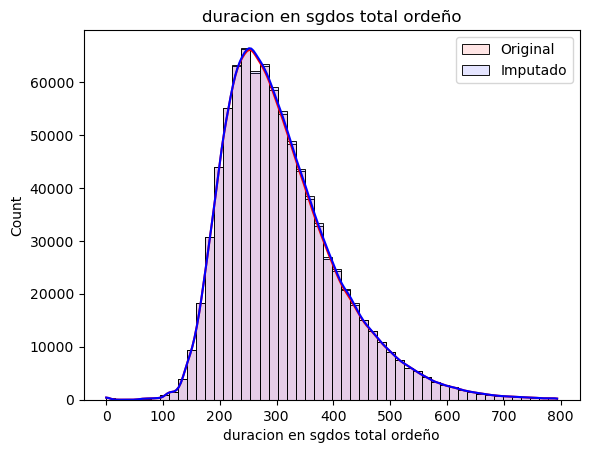

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


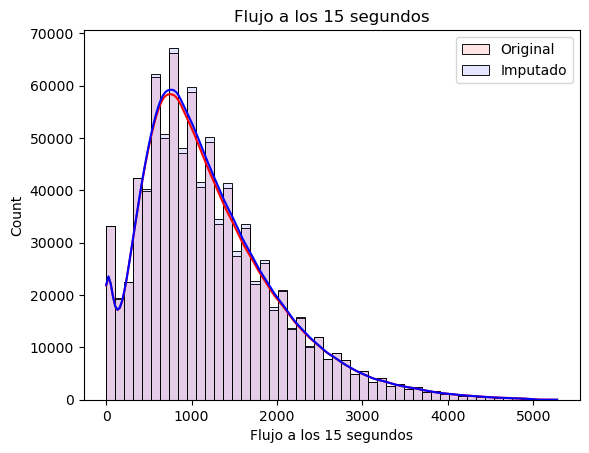

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


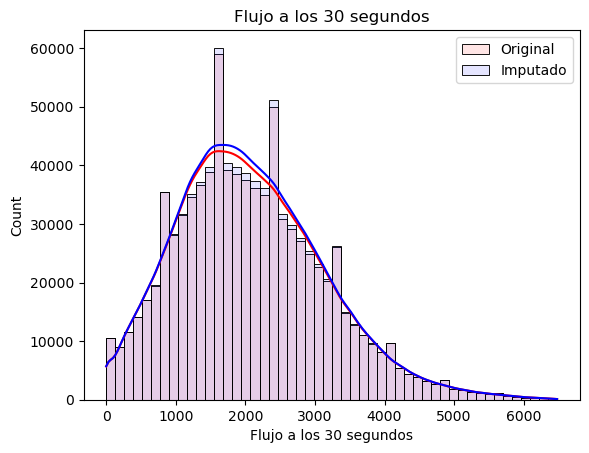

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


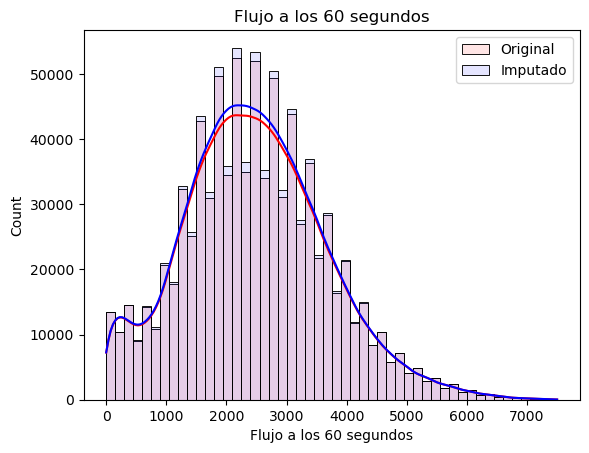

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


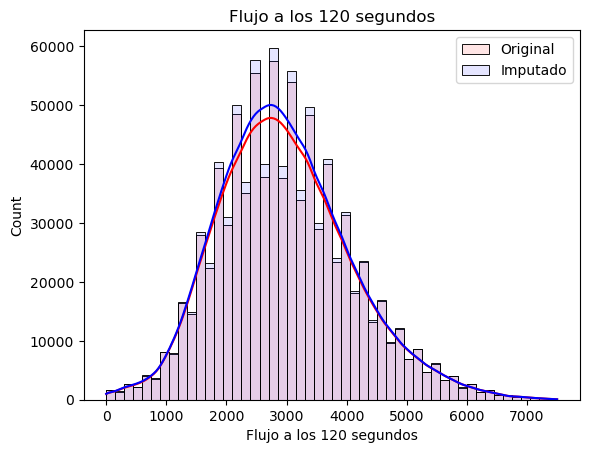

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


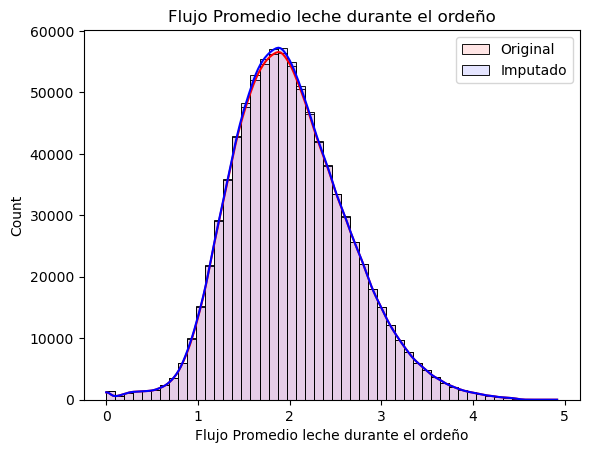

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


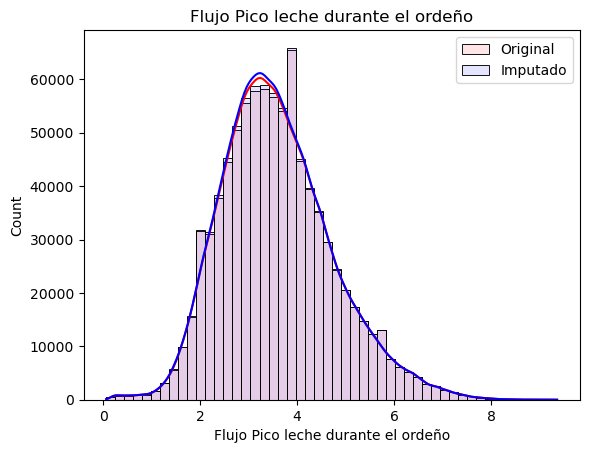

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


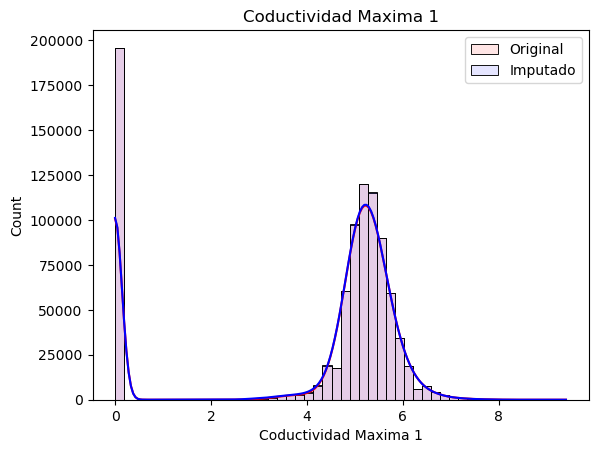

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


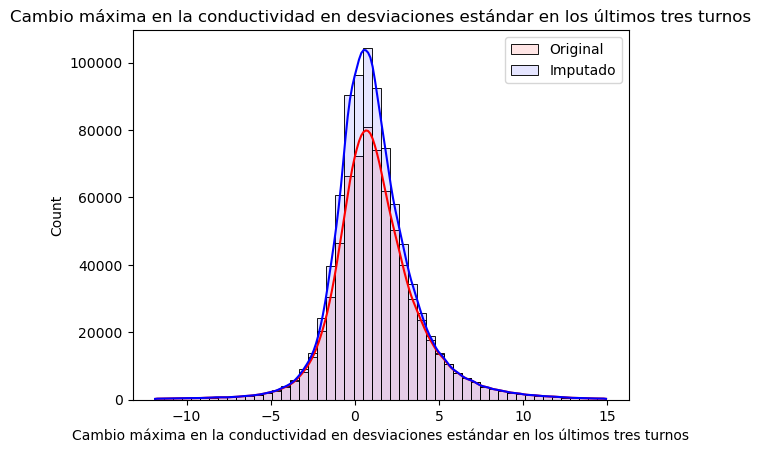

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


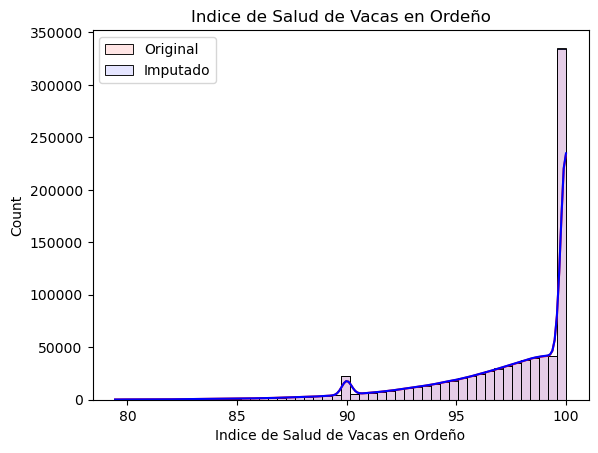

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


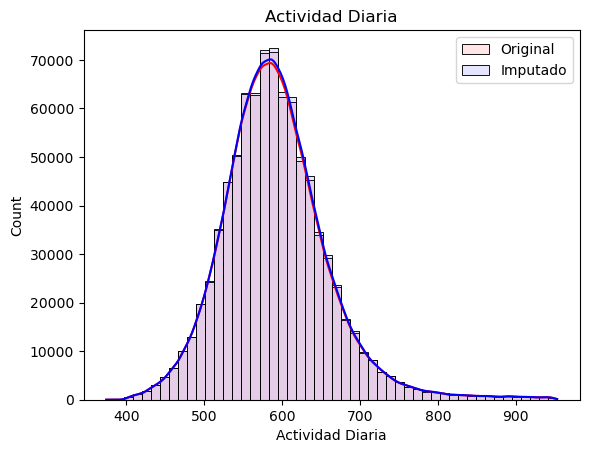

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


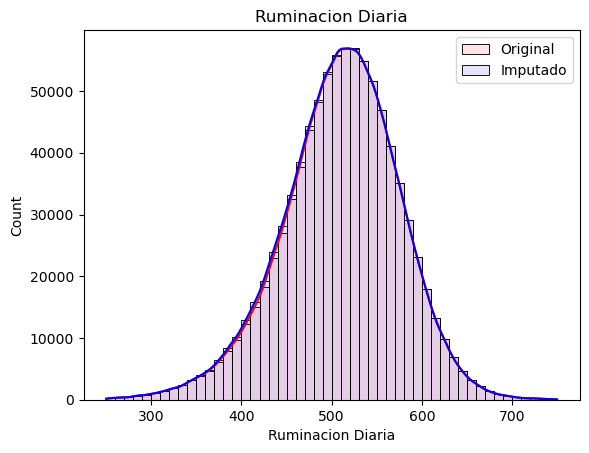

In [35]:
for col in cols_numeric:
    sns.histplot(df[col], bins= 50, kde= True, color="red", alpha=0.1, label="Original")
    sns.histplot(df_imputed_knn[col], bins= 50, kde= True, color="blue", alpha=0.1, label="Imputado")
    plt.title(col)
    plt.legend()
    plt.show()

Se debe realizar una comparación de las medias y distribución de las variables imputadas para comparar resultado de la imputación...

 y luego al final del modelo determinar si es utíl este metodo para el objetivo del proyecto y el modelo o algoritmo usado para la tarea.

In [38]:
print(df.shape)
print(df_imputed_knn.shape)

(876900, 34)
(876900, 21)


In [39]:
for col in cols_numeric:
    print(f'{col}: con {round(   ((df[col].isna().sum() / df.shape[0]) * 100 ),3 )} % de nan')
    print("ORIGINAL min:", df[col].min())
    print("IMPUTADO min:", df_imputed_knn[col].min())
    print("ORIGINAL max:", df[col].max())
    print("IMPUTADO max:", df_imputed_knn[col].max())
    print("ORIGINAL media:", df[col].mean())
    print("IMPUTADO media:", df_imputed_knn[col].mean())
    print("ORIGINAL std:", df[col].std())
    print("IMPUTADO std:", df_imputed_knn[col].std())
    
    print("")

Días secos de lactancia anterior: con 31.895 % de nan
ORIGINAL min: 43.0
IMPUTADO min: 43.0
ORIGINAL max: 151.0
IMPUTADO max: 151.0
ORIGINAL media: 76.09996667833204
IMPUTADO media: 72.71352283206988
ORIGINAL std: 15.745971608936411
IMPUTADO std: 14.197087805888334

Nº de Celos del Sistema: con 0.0 % de nan
ORIGINAL min: 0.0
IMPUTADO min: 0.0
ORIGINAL max: 27.0
IMPUTADO max: 27.0
ORIGINAL media: 5.342507697570989
IMPUTADO media: 5.342507697570989
ORIGINAL std: 3.2116177164684587
IMPUTADO std: 3.2116177164684587

lapso_sgdos_a_ordeña_ant: con 12.628 % de nan
ORIGINAL min: 25868.0
IMPUTADO min: 25868.0
ORIGINAL max: 60000.0
IMPUTADO max: 60000.0
ORIGINAL media: 42837.194224772866
IMPUTADO media: 43412.79845675212
ORIGINAL std: 6504.188740209244
IMPUTADO std: 6470.931674076731

Hora inicio del ordeño en sgdos: con 0.775 % de nan
ORIGINAL min: 18000.0
IMPUTADO min: 18000.0
ORIGINAL max: 84088.0
IMPUTADO max: 84088.0
ORIGINAL media: 44386.190290333776
IMPUTADO media: 44417.89918763991
ORIGI

In [42]:
df2 = df.copy()

for col in cols_numeric:
    print(col)
    df2[col] = round(df_imputed_knn[col], 3)

Días secos de lactancia anterior
Nº de Celos del Sistema
lapso_sgdos_a_ordeña_ant
Hora inicio del ordeño en sgdos
Porduccion del Turno
Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal
Produccion de Leche a los 2 minutos
Porcentaje de leche a los 2 minutos
sgdos al Pico de leche durante el Tiempo de ordeño
duracion en sgdos total ordeño
Flujo a los 15 segundos
Flujo a los 30 segundos
Flujo a los 60 segundos
Flujo a los 120 segundos
Flujo Promedio leche durante el ordeño
Flujo Pico leche durante el ordeño
Coductividad Maxima 1
Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos
Indice de Salud de Vacas en Ordeño
Actividad Diaria
Ruminacion Diaria


In [43]:
(df2.isna().sum() / df2.shape[0]).sort_values(ascending=False).head(30)

PERÍODO DE RESGUARDO LECHE                                                               0.999268
DIAS DE TRATAMIENTO                                                                      0.999068
TIPO DE EVENTO                                                                           0.998767
Modo del Ultimo  Parto                                                                   0.056025
Coductividad Maxima 1                                                                    0.000000
Flujo a los 30 segundos                                                                  0.000000
Flujo a los 60 segundos                                                                  0.000000
Flujo a los 120 segundos                                                                 0.000000
Flujo Promedio leche durante el ordeño                                                   0.000000
Flujo Pico leche durante el ordeño                                                       0.000000
Eventos de Salud del

In [44]:
indices = df[df["N° de la Vaca"]==999].index
df.drop(indices, inplace= True)
df.reset_index(drop= True, inplace= True)

In [48]:
# DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)
df_sample = df2.sample(frac=0.33, random_state=42, axis=0, ignore_index=True)
df_sample.groupby([df_sample["Fecha_dia"].dt.year, df_sample["Fecha_dia"].dt.month]).size()

Fecha_dia  Fecha_dia
2021       10            6872
           11            7855
           12            8770
2022       1             9350
           2             8100
           3             9398
           4             8975
           5             7192
           6             4753
           7             3991
           8             7018
           9             8008
           10           10304
           11           11509
           12           12557
2023       1            13156
           2            11915
           3            12864
           4            12300
           5            10701
           6             6606
           7             4658
           8             7881
           9            10672
           10           12942
           11           13759
           12           14534
2024       1            14660
           2            13286
           3             4791
dtype: int64

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


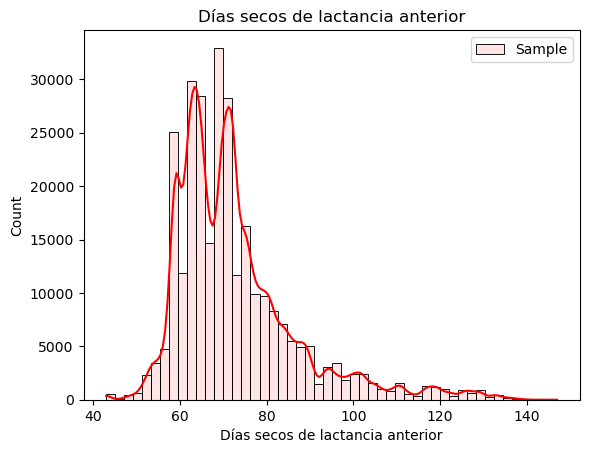

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


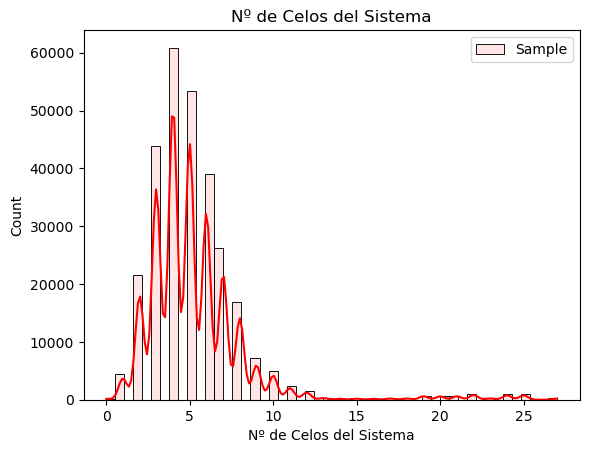

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


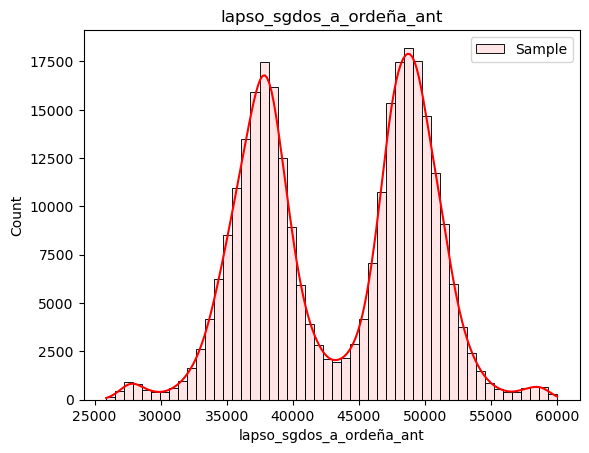

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


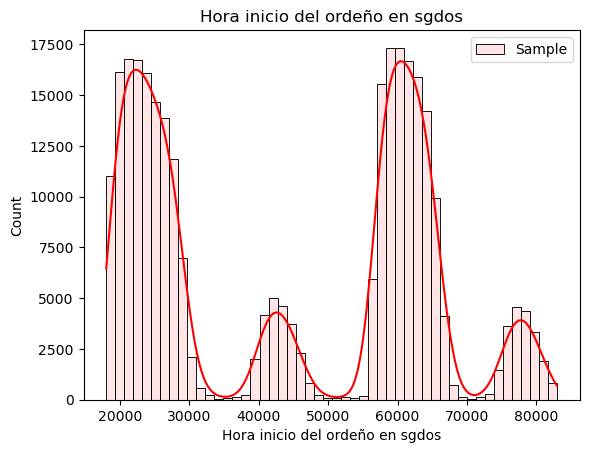

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


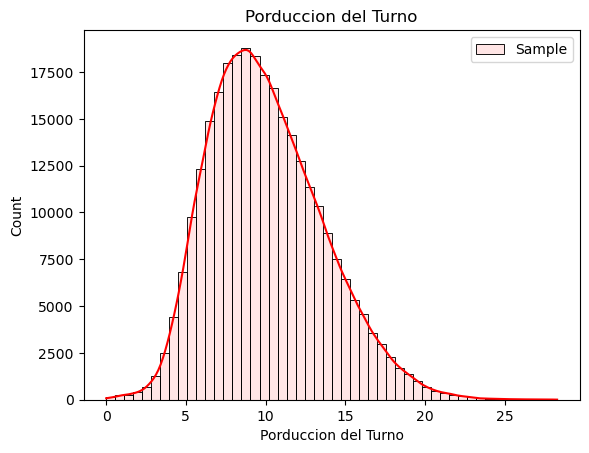

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


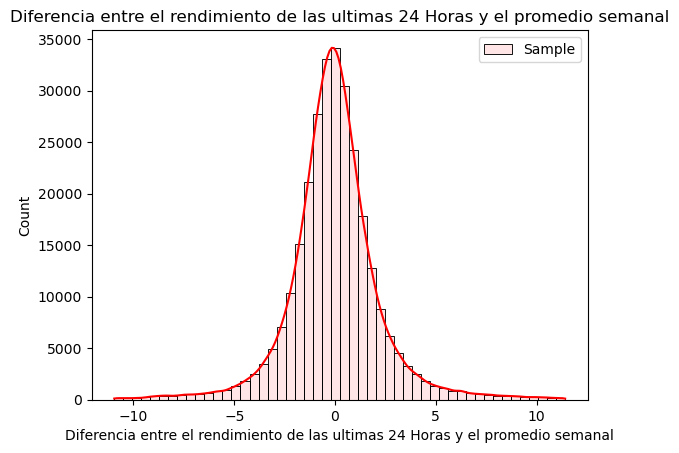

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


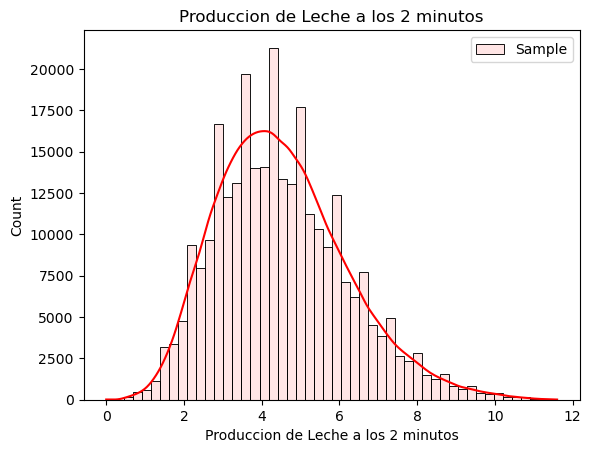

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


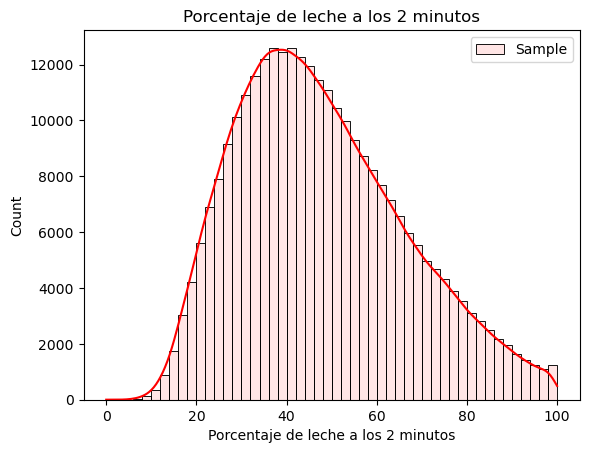

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


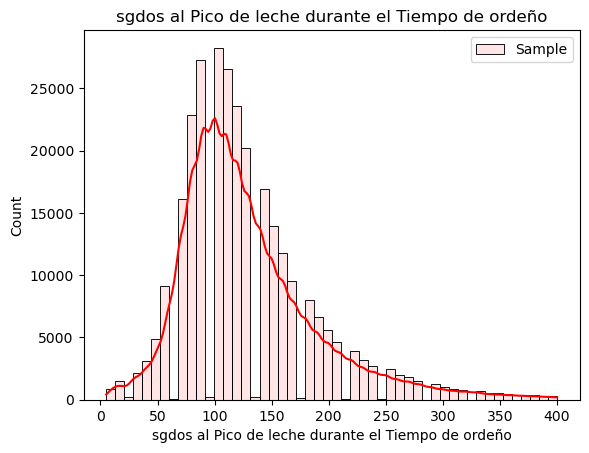

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


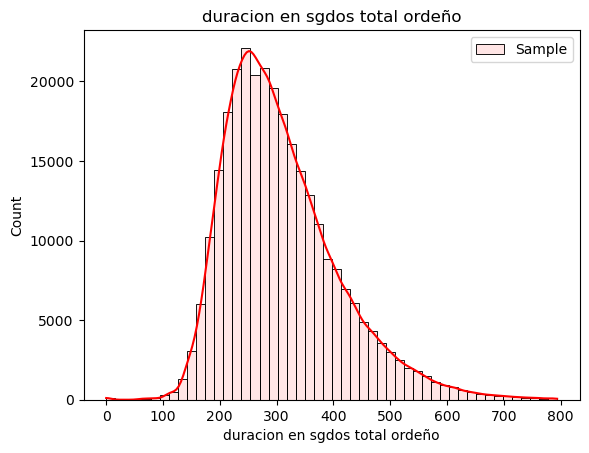

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


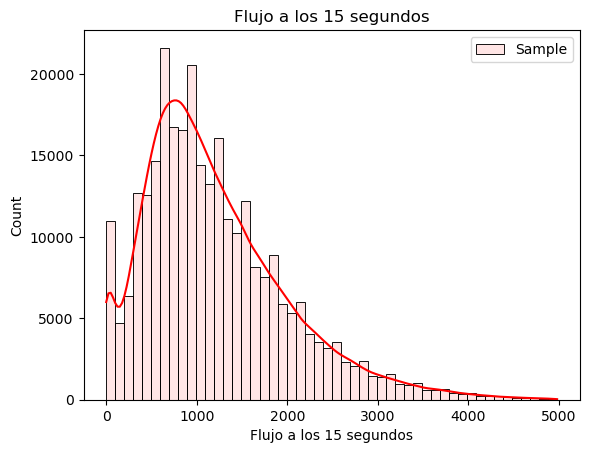

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


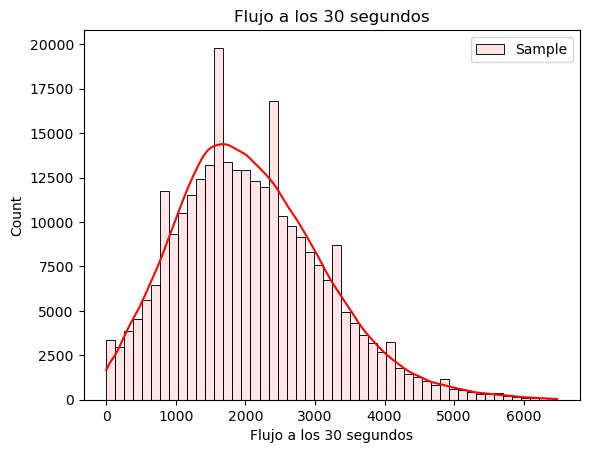

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


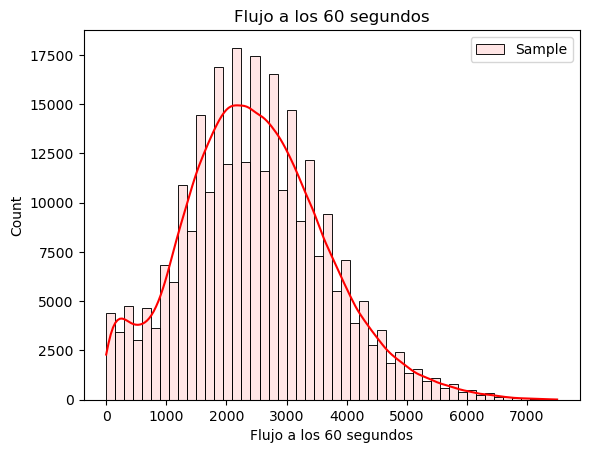

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


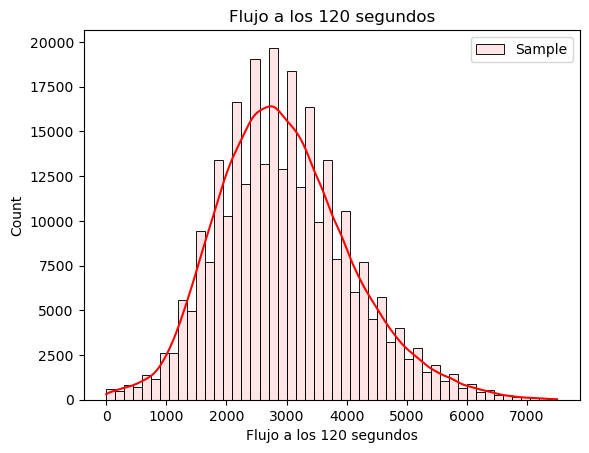

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


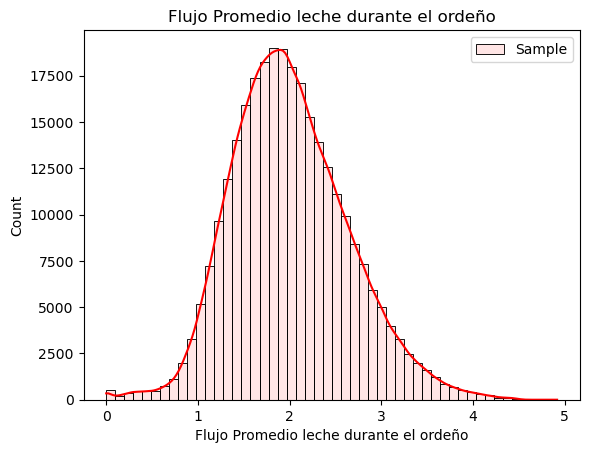

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


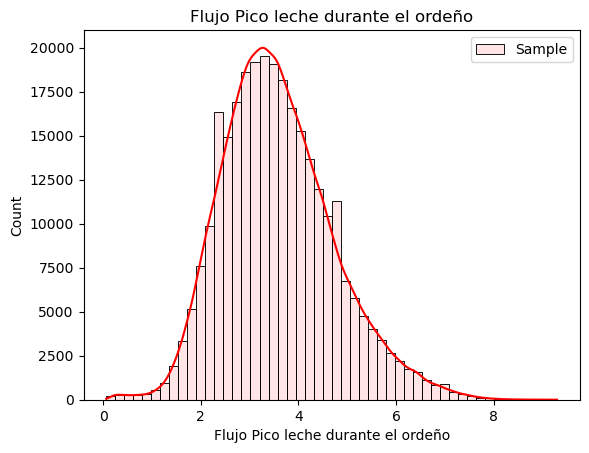

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


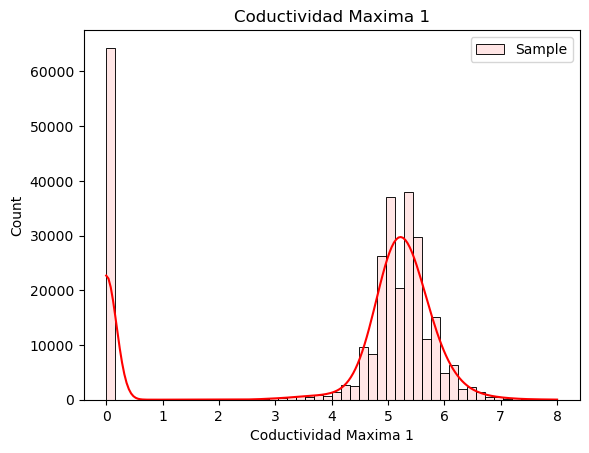

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


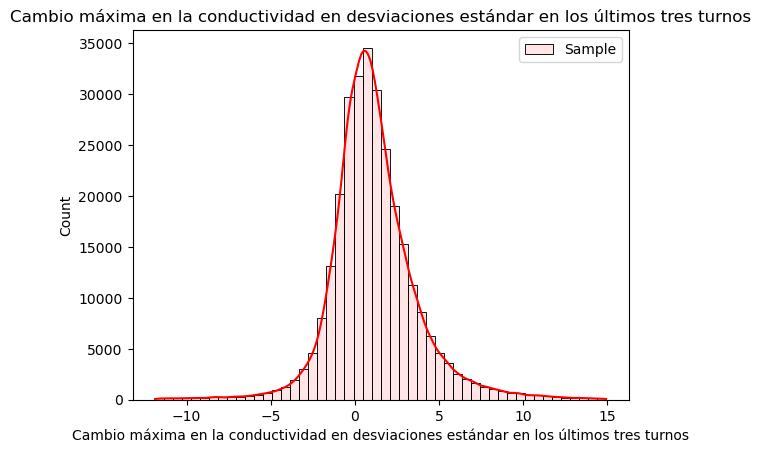

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


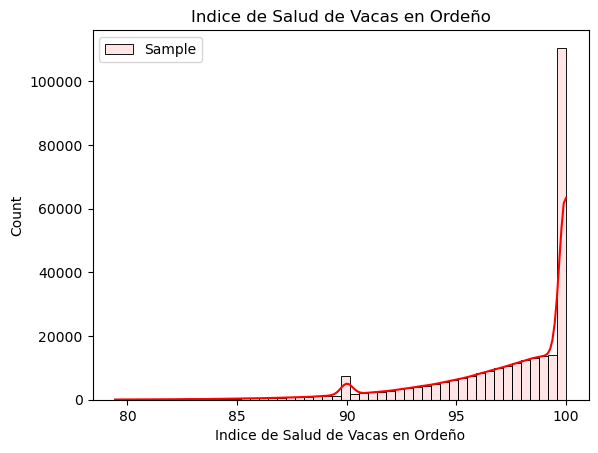

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


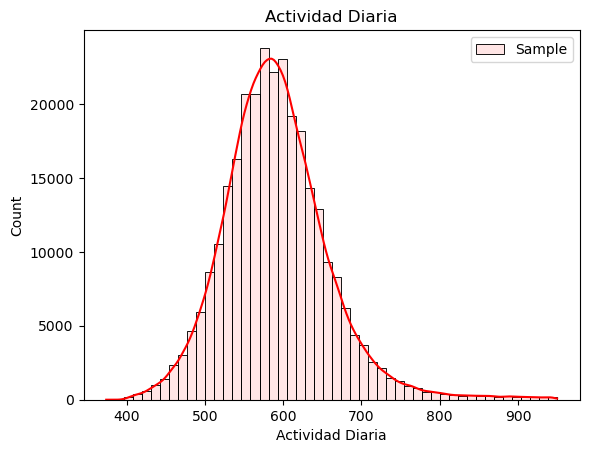

/Users/mfernandez9120/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


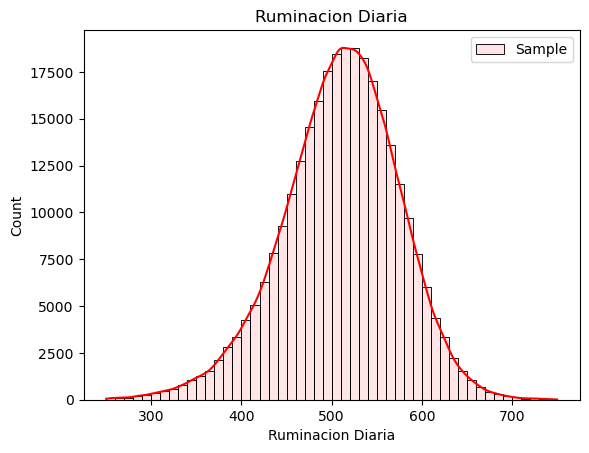

In [50]:
for col in cols_numeric:
    sns.histplot(df_sample[col], bins= 50, kde= True, color="red", alpha=0.1, label="Sample")
    #sns.histplot(df_imputed_knn[col], bins= 50, kde= True, color="blue", alpha=0.1, label="Imputado")
    plt.title(col)
    plt.legend()
    plt.show()

In [ ]:
df[df["TIPO DE EVENTO"].notna()]
df2[df2["TIPO DE EVENTO"].notna()]

for col in cols_numeric:
    print(f'{col}: con {round(   ((df[df["TIPO DE EVENTO"].notna()][col].isna().sum() / df[df["TIPO DE EVENTO"].notna()].shape[0]) * 100 ),3 )} % de nan')
    print("ORIGINAL min:", df[df["TIPO DE EVENTO"].notna()][col].min())
    print("IMPUTADO min:", df2[df2["TIPO DE EVENTO"].notna()][col].min())
    print("ORIGINAL max:", df[df["TIPO DE EVENTO"].notna()][col].max())
    print("IMPUTADO max:", df2[df2["TIPO DE EVENTO"].notna()][col].max())
    print("ORIGINAL media:", df[df["TIPO DE EVENTO"].notna()][col].mean())
    print("IMPUTADO media:", df2[df2["TIPO DE EVENTO"].notna()][col].mean())
    print("ORIGINAL std:", df[df["TIPO DE EVENTO"].notna()][col].std())
    print("IMPUTADO std:",df2[df2["TIPO DE EVENTO"].notna()][col].std())
    
    print("")

## EXPORTACION DE LOS DATASET

In [52]:
os.getcwd()

'/Users/mfernandez9120/Library/CloudStorage/Dropbox/MARCOS FERNANDEZ/Magister Data Science/Proyecto de Grado 2/Proyecto-Grado-DS/BD procesada y sample/version 2'

In [53]:
df2.to_csv('df_preprocesado_target_real_knn_code2.csv', sep=';', decimal=',', index=False)

df2 = pd.read_csv('df_preprocesado_target_real_knn_code2.csv', sep=';', decimal=',', date_format='%Y-%m-%d')
df2

In [55]:
df_sample.to_csv('df_sample_imputed_knn_code2.csv', sep=';', decimal=',', index=False)

df_sample2 = pd.read_csv('df_sample_imputed_knn_code2_recuperado.csv', sep=';', decimal=',', date_format='%Y-%m-%d')
df_sample2